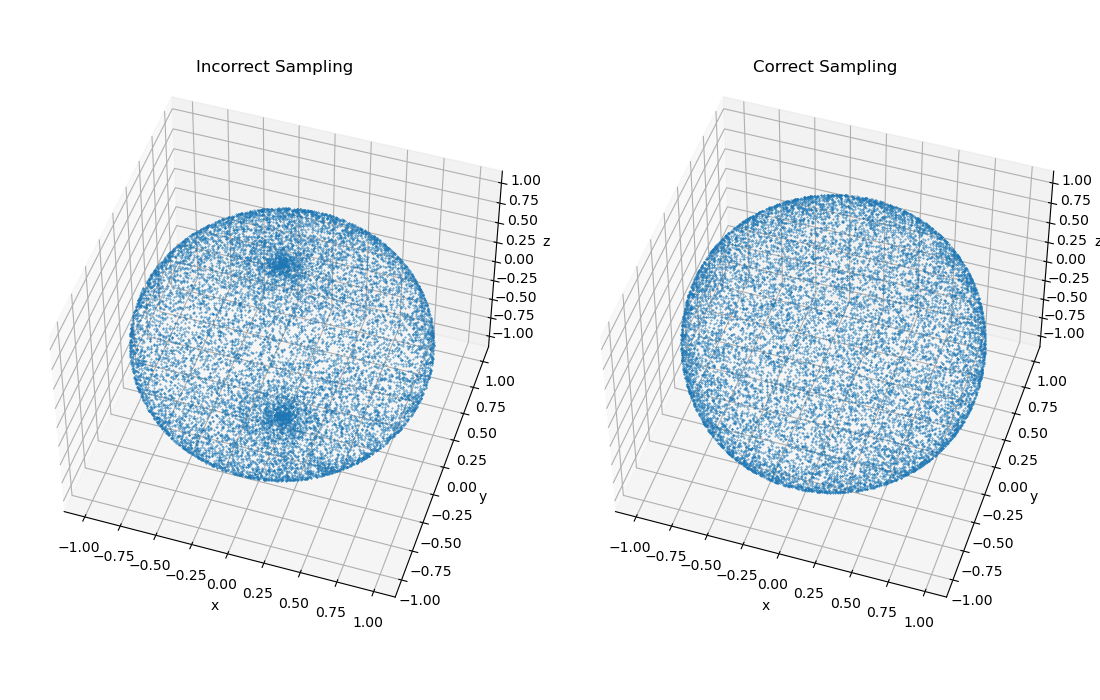

In [2]:
# surface_sampling_sphere.ipynb

# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random


def plot_incorrect(ax):
    num_samples = 15000

    u = random.rand(num_samples) * np.pi  # poloidal angle
    v = random.rand(num_samples) * 2 * np.pi  # toroidal angle

    x = np.sin(u) * np.sin(v) #convert to cartesian from spherical
    y = np.sin(u) * np.cos(v)
    z = np.cos(u)

    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    ax.view_init(azim=-72, elev=48) #define initial view angle

    pixel_size = (72 / ax.figure.dpi) ** 2 #dot size = pixel size
    ax.scatter(x, y, z, marker=".", s=pixel_size, depthshade=False)


def plot_correct(ax):
    num_samples = 15000

    u = random.rand(num_samples) * np.pi  # poloidal angle
    v = random.rand(num_samples) * 2 * np.pi  # toroidal angle

    x = np.sin(u)**(1/2) * np.sin(v) #In spherical coordinates the volume element has an r^2 term and a sin
    #(u) term. But on the surface r is a constant, equal to 1. So this time it is the extra sin term that 
    #is messing up the sampling. So we square root the sin terms and the problem goes away.
    y = np.sin(u)**(1/2) * np.cos(v)
    z = np.cos(u)

    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    ax.view_init(azim=-72, elev=48)

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x, y, z, marker=".", s=pixel_size, depthshade=False)


def main():
    plt.close("all")
    fig = plt.figure(" ", constrained_layout=True)
    fig.set_size_inches(11, 7)

    gs = fig.add_gridspec(1, 2)

    ax = fig.add_subplot(gs[0, 0], projection="3d")
    plot_incorrect(ax)

    ax = fig.add_subplot(gs[0, 1], projection="3d")
    plot_correct(ax)

    plt.show()


main()